<a href="https://colab.research.google.com/github/mkaustubh/data-analytics/blob/main/SharkTankIndia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is a [Shark Tank India](https://github.com/mkaustubh/data-analytics) notebook. You can reference the dataset at [this link](https://www.kaggle.com/thirumani/shark-tank-india).**
___


In [1]:
!pip install -q kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/ColabNotebooks/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets list

In [2]:
!kaggle datasets download -d thirumani/shark-tank-india
!kaggle datasets download -d nehaprabhavalkar/india-gis-data

  0% 0.00/8.00k [00:00<?, ?B/s]
100% 8.00k/8.00k [00:00<00:00, 20.1MB/s]
  0% 0.00/6.18M [00:00<?, ?B/s]
100% 6.18M/6.18M [00:00<00:00, 101MB/s]


In [ ]:
!unzip shark-tank-india.zip
!unzip india-gis-data.zip
!pip install geopandas

In [4]:
import numpy as np # linear algebra
import pandas as pd # for data preparation
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
shark_tank = pd.read_csv('Shark Tank India.csv', index_col='Pitch Number')
shark_tank.shape

(121, 49)

In [6]:
shark_tank.head()

,Season Number,Episode Number,Episode Title,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
Pitch Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,Badlegi Business Ki Tasveer,BluePine Foods,Food,Frozen Momos,https://bluepinefoods.com/,3,2.0,1.0,0.0,Middle,2016.0,Delhi,Delhi,95.0,800000.0,NaN,50.0,5.0,1000,1,1.0,75.0,16.00,NaN,469.0,25.0,5.33,NaN,0.0,0.0,NaN,0.0,0.0,NaN,25.0,5.33,NaN,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,1,1,Badlegi Business Ki Tasveer,Booz Scooters,Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,1,1.0,NaN,0.0,Young,2017.0,Ahmedabad,Gujarat,4.0,40000.0,NaN,40.0,15.0,267,1,1.0,40.0,50.00,NaN,80.0,20.0,25.00,NaN,0.0,0.0,NaN,0.0,0.0,NaN,20.0,25.00,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1,1,Badlegi Business Ki Tasveer,Heart up my Sleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,1,NaN,1.0,0.0,Young,2021.0,Delhi,Delhi,NaN,200000.0,NaN,25.0,10.0,250,1,1.0,25.0,30.00,NaN,83.0,0.0,0.00,NaN,0.0,0.0,NaN,12.5,15.0,NaN,12.5,15.00,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1,2,"Insaan, Ideas Aur Sapne",Tagz Foods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2,2.0,NaN,0.0,Middle,2019.0,Bangalore,Karnataka,700.0,NaN,48.0,70.0,1.0,7000,1,1.0,70.0,2.75,NaN,2545.0,70.0,2.75,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.00,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,1,2,"Insaan, Ideas Aur Sapne",Head and Heart,Education,Brain Development Course,https://thehnh.in/,4,1.0,3.0,1.0,Middle,2015.0,NaN,Punjab,30.0,NaN,NaN,50.0,5.0,1000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
shark_tank.tail()

,Season Number,Episode Number,Episode Title,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
Pitch Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
117,1,35,The Final Destination,Elcare India,Medical,Carenting for Elders,https://elcare.co/,3,2.0,1.0,0.0,Middle,2021.0,Mumbai,Maharashtra,60.0,NaN,30.0,100.0,2.50,4000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,1,36,Gateway To Shark Tank India,SneaKare,Beauty/Fashion,Shoe Sneaker kits storage crates,https://sneakare.com/,1,1.0,NaN,0.0,Young,2020.0,Delhi,Delhi,NaN,700000.0,NaN,20.0,5.00,400,1,1.0,21.0,12.0,NaN,175.0,NaN,NaN,NaN,7.0,4.0,NaN,0.0,0.0,NaN,7.0,4.0,NaN,7.0,4.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,3.0
119,1,36,Gateway To Shark Tank India,French Crown,Beauty/Fashion,Clothes,https://frenchcrown.in/,2,2.0,NaN,0.0,Middle,2017.0,Surat,Gujarat,7200.0,NaN,70.0,150.0,0.33,45455,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,1,36,Gateway To Shark Tank India,Store My Goods,Services,Storage solutions,https://storemygoods.in/,3,2.0,1.0,1.0,Middle,2020.0,Noida,Uttar Pradesh,100.0,NaN,NaN,100.0,1.75,5714,1,1.0,50.0,4.0,50.0,1250.0,NaN,NaN,NaN,25.0,2.0,25.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,25.0,2.0,25.0,NaN,NaN,NaN,2.0
121,1,36,Gateway To Shark Tank India,Devnagri,Technology,Translation of language content,https://devnagri.com/,2,2.0,NaN,0.0,Middle,2020.0,Delhi,Delhi,500.0,NaN,NaN,100.0,1.00,10000,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


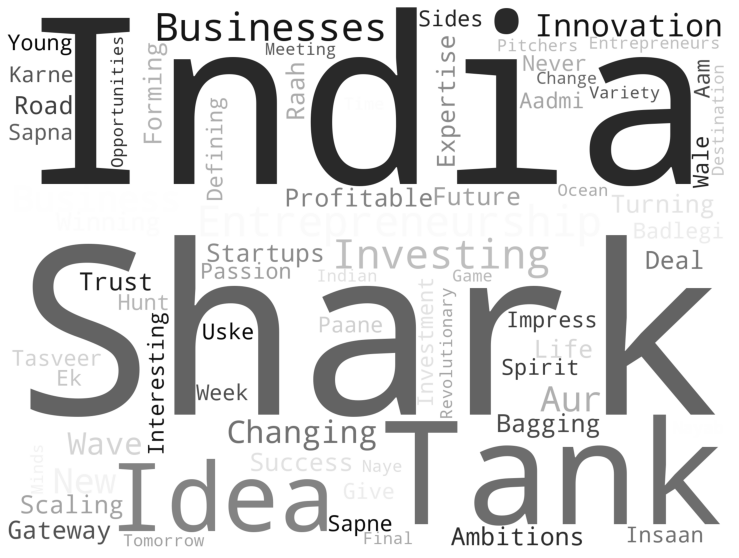

In [8]:
# Word cloud based on episode titles
text = " Shark Tank India ".join(cat for cat in shark_tank['Episode Title'])
stop_words = list(STOPWORDS) + ["Ka", "Ki", "Ko"]
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='white', colormap='Greys', collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Data Cleaning

## Dataset Info

In [9]:
shark_tank = shark_tank.fillna(0)

In [10]:
shark_tank.head()

,Season Number,Episode Number,Episode Title,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
Pitch Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,Badlegi Business Ki Tasveer,BluePine Foods,Food,Frozen Momos,https://bluepinefoods.com/,3,2.0,1.0,0.0,Middle,2016.0,Delhi,Delhi,95.0,800000.0,0.0,50.0,5.0,1000,1,1.0,75.0,16.00,0.0,469.0,25.0,5.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,5.33,0.0,25.0,5.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,1,1,Badlegi Business Ki Tasveer,Booz Scooters,Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,1,1.0,0.0,0.0,Young,2017.0,Ahmedabad,Gujarat,4.0,40000.0,0.0,40.0,15.0,267,1,1.0,40.0,50.00,0.0,80.0,20.0,25.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,25.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,1,1,Badlegi Business Ki Tasveer,Heart up my Sleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,1,0.0,1.0,0.0,Young,2021.0,Delhi,Delhi,0.0,200000.0,0.0,25.0,10.0,250,1,1.0,25.0,30.00,0.0,83.0,0.0,0.00,0.0,0.0,0.0,0.0,12.5,15.0,0.0,12.5,15.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,1,2,"Insaan, Ideas Aur Sapne",Tagz Foods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2,2.0,0.0,0.0,Middle,2019.0,Bangalore,Karnataka,700.0,0.0,48.0,70.0,1.0,7000,1,1.0,70.0,2.75,0.0,2545.0,70.0,2.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,1,2,"Insaan, Ideas Aur Sapne",Head and Heart,Education,Brain Development Course,https://thehnh.in/,4,1.0,3.0,1.0,Middle,2015.0,0,Punjab,30.0,0.0,0.0,50.0,5.0,1000,0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
pd.DataFrame({
    'Number of Episodes':[shark_tank['Episode Number'].max()],
    'Startup Pitched':[shark_tank['Startup Name'].count()],
    'Total Invested Amount(in Lakhs)':[int(shark_tank['Total Deal Amount'].sum())],
    'Total Equity':[int(shark_tank['Total Deal Equity'].sum())],
    'Number of Deals Closed':[shark_tank['Accepted Offer'].value_counts()[1]]
    },index=['Count'])

,Number of Episodes,Startup Pitched,Total Invested Amount(in Lakhs),Total Equity,Number of Deals Closed
Count,36,121,3903,1064,67


## Data Stats

### Industry-wise pitches


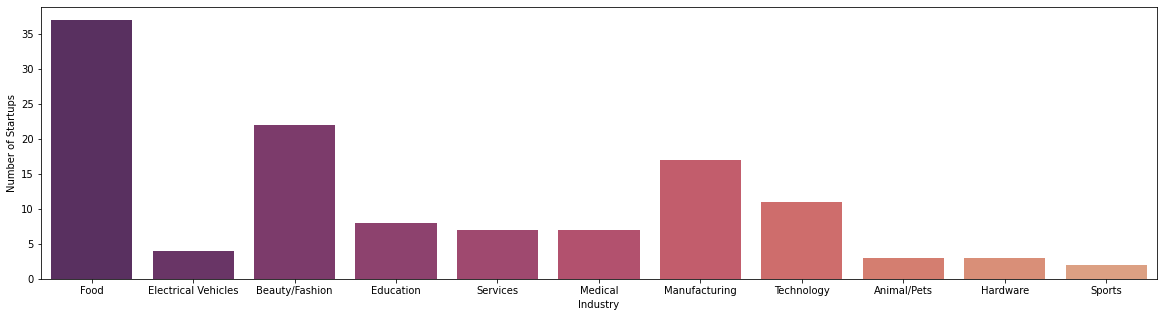

In [12]:
plt.figure(figsize=(20,5))
sns.countplot(shark_tank['Industry'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.show()

### State Wise

In [13]:
from collections import Counter
col = shark_tank[(shark_tank['Pitchers State']!=0)]['Pitchers State'].tolist()
d = Counter(col)
df = pd.DataFrame({
    'States':d.keys(),
    'Number of Startups':d.values()
})

In [14]:
shp_gdf = gpd.read_file('India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(df.set_index('States'))
merged['Number of Startups'] = merged['Number of Startups']

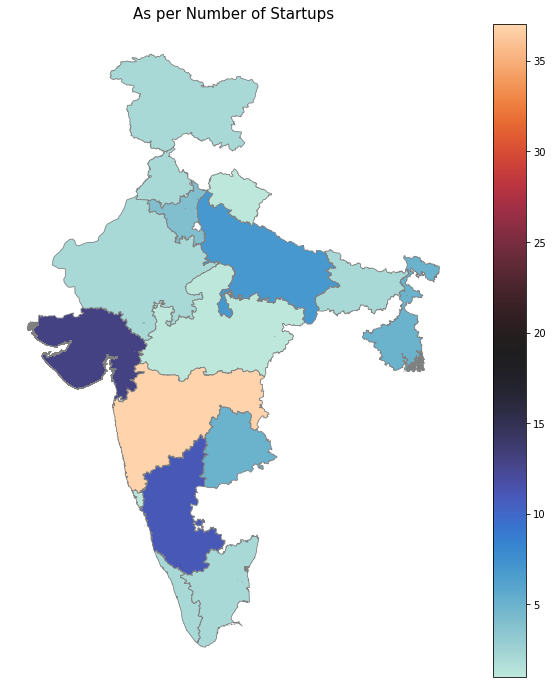

In [15]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('As per Number of Startups', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Number of Startups', cmap='icefire', linewidth=0.8, ax=ax, edgecolor='0.5', legend=True)

### Year Wise

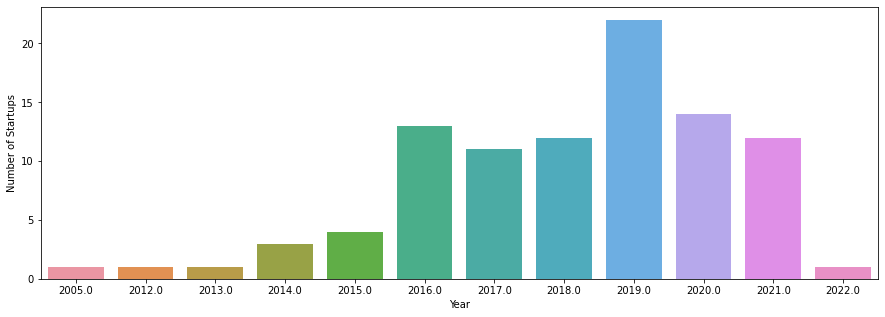

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(shark_tank[shark_tank['Started in']!=0]['Started in'])
plt.ylabel('Number of Startups')
plt.xlabel('Year')
plt.show()

### Received v/s Not Received *Offer*

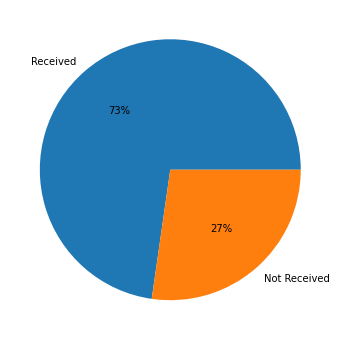

In [17]:
data = [shark_tank['Received Offer'].sum(), shark_tank.shape[0]-shark_tank['Received Offer'].sum()]
labels = ['Received', 'Not Received']
plt.figure(figsize=(12,6))
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

### Accepted v/s Not Accepted *Offer*

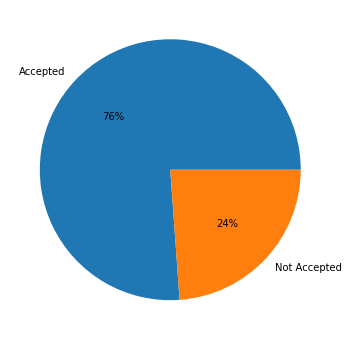

In [18]:
data = [shark_tank['Accepted Offer'].sum(), shark_tank['Received Offer'].sum()-shark_tank['Accepted Offer'].sum()]
labels = ['Accepted', 'Not Accepted']
plt.figure(figsize=(12,6))
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

## Data Analysis

### Male vs Female Presenters

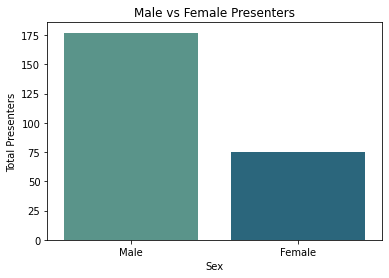

In [19]:
df = pd.DataFrame({
    'Total Presenters':[shark_tank['Male Presenters'].sum(),shark_tank['Female Presenters'].sum()],
    'Sex':['Male','Female']
})
plt.title('Male vs Female Presenters')
sns.barplot(y='Total Presenters', x='Sex', data=df, palette='crest')
plt.show()

### Pitcher's Average Age


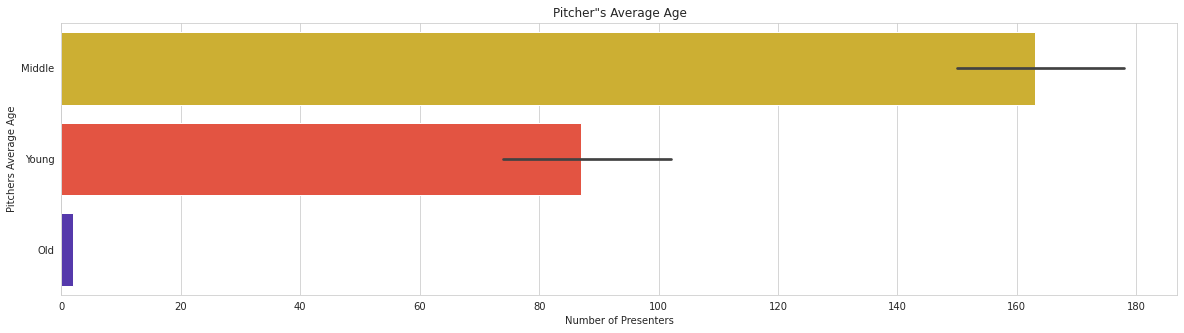

In [20]:
plt.figure(figsize=(20,5))
sns.set_style('whitegrid')
sns.barplot(x='Number of Presenters', y='Pitchers Average Age', data=shark_tank, palette='CMRmap_r', estimator = np.sum)
plt.title('Pitcher"s Average Age')
plt.xticks(range(0,200,20))
plt.show()

### Number of sharks in deal

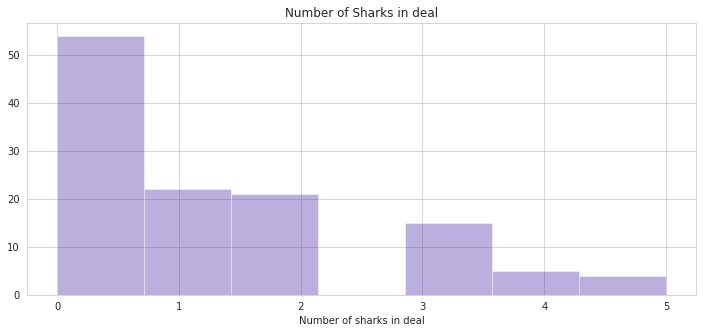

In [21]:
plt.figure(figsize=(12,5))
plt.title('Number of Sharks in deal')

sns.set_style('dark')
sns.distplot(shark_tank['Number of sharks in deal'], kde=False, color='#5539AB')
plt.show()

### Invested Amount per Episode

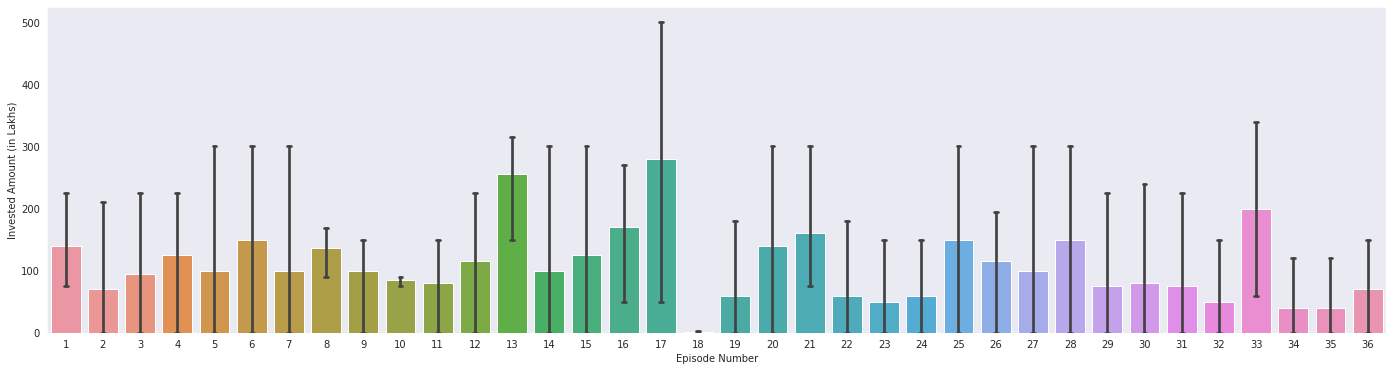

In [22]:
plt.figure(figsize=(24,6))
sns.barplot(data=shark_tank, x="Episode Number", y="Total Deal Amount", estimator=np.sum, capsize=0.1)
plt.ylabel('Invested Amount (in Lakhs)')
plt.show()

### Highest Investment

As per Highest Deal Amount

In [23]:
df = shark_tank.loc[shark_tank['Accepted Offer']==1,['Startup Name', 'Total Deal Amount', 'Total Deal Equity', 'Total Deal Debt']]
df = df.sort_values(by=['Total Deal Amount'],ascending=False)[:10]

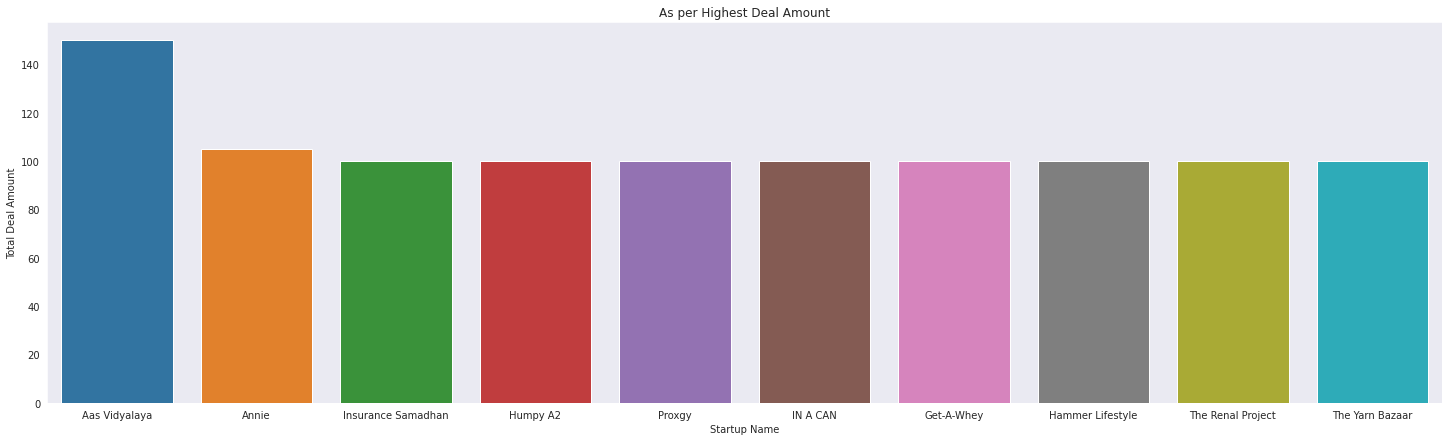

In [24]:
plt.figure(figsize=(25,7))
sns.barplot(x='Startup Name', y='Total Deal Amount', data=df)
plt.title('As per Highest Deal Amount')
plt.show()

As per Highest Debt

In [25]:
df = shark_tank.loc[shark_tank['Accepted Offer']==1,['Startup Name', 'Total Deal Amount', 'Total Deal Equity', 'Total Deal Debt']]
df = df.sort_values(by=['Total Deal Debt'],ascending=False)[:10]

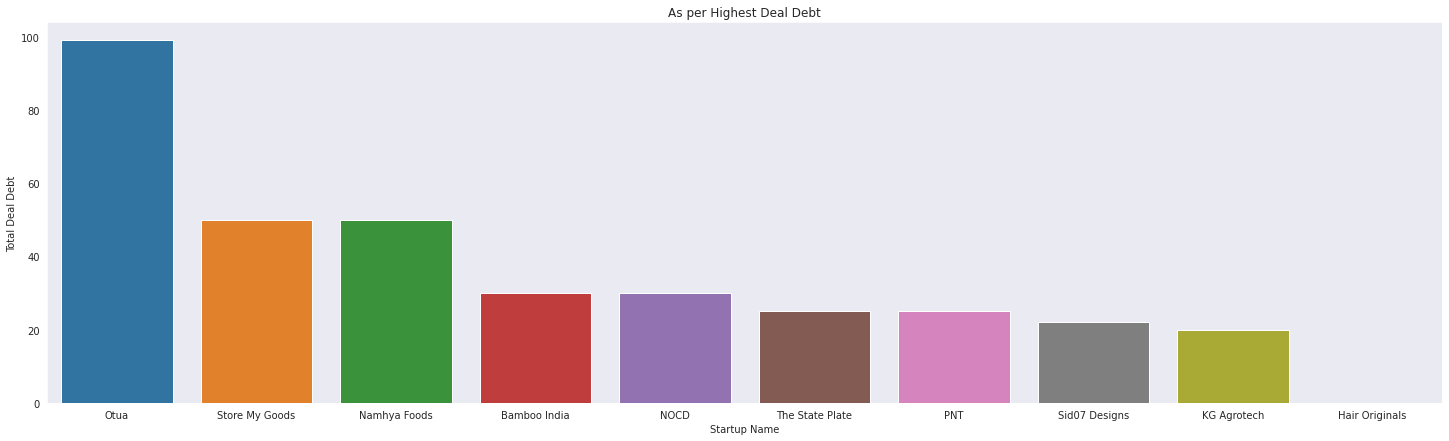

In [26]:
plt.figure(figsize=(25,7))
sns.barplot(x='Startup Name', y='Total Deal Debt', data=df)
plt.title('As per Highest Deal Debt')
plt.show()

As per Highest Equity

In [27]:
df = shark_tank.loc[shark_tank['Accepted Offer']==1,['Startup Name', 'Total Deal Amount', 'Total Deal Equity', 'Total Deal Debt']]
df = df.sort_values(by=['Total Deal Equity'],ascending=False)[:10]

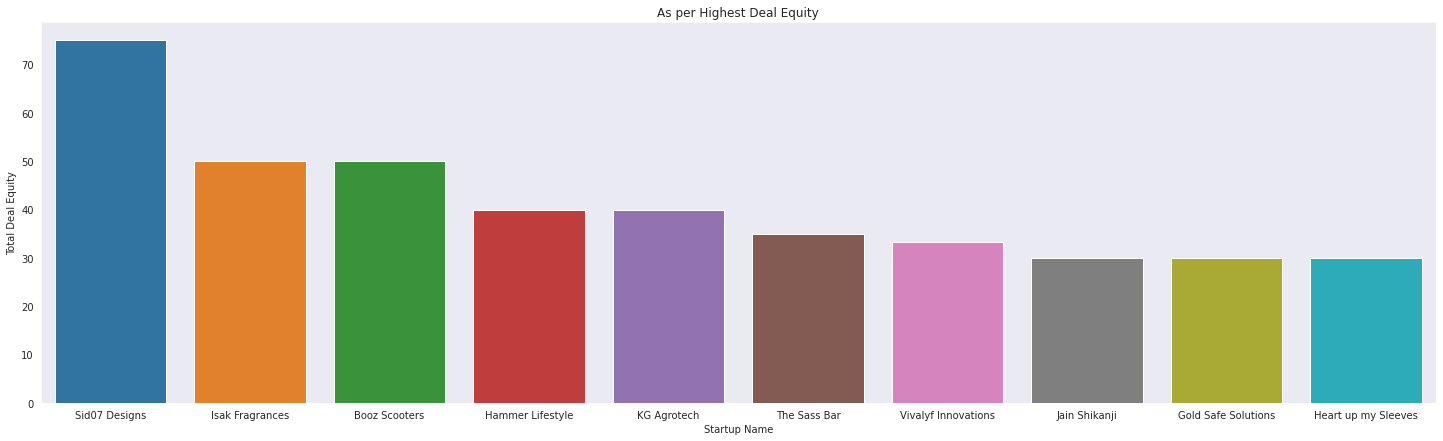

In [28]:
plt.figure(figsize=(25,7))
sns.barplot(x='Startup Name', y='Total Deal Equity', data=df)
plt.title('As per Highest Deal Equity')
plt.show()

## Sharks Investment Analysis

### Aman's Investment Stats

In [29]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[shark_tank['Aman Investment Amount'].sum()//1],
    'Debt Amt(Lakhs)':[shark_tank['Aman Debt Amount'].sum()//1],
    'Equity Received':[shark_tank['Aman Investment Equity'].sum()]
},
index=['Count'])

,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,894.0,50.0,164.246


#### Industry Wise

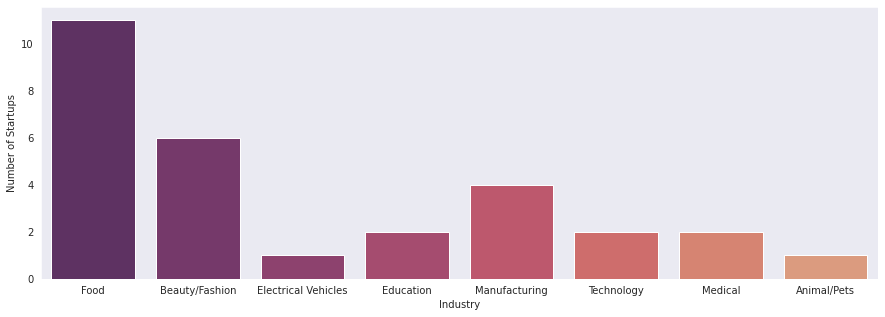

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(shark_tank[shark_tank['Aman Investment Amount']!=0]['Industry'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.show()

In [31]:
shark_tank.loc[(shark_tank['Aman Investment Amount']!=0),['Startup Name','Number of sharks in deal','Aman Investment Amount','Aman Investment Equity','Aman Debt Amount']].head()

,Startup Name,Number of sharks in deal,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount
Pitch Number,,,,,
1,BluePine Foods,3.0,25.0,5.33,0.0
8,Peeschute,1.0,75.0,6.00,0.0
12,Bummer,2.0,37.5,3.75,0.0
13,Revamp Moto,2.0,50.0,0.75,0.0
16,Skippi Ice Pops,5.0,20.0,3.00,0.0


### Ashneer's Investment Stats

In [32]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[shark_tank['Ashneer Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[shark_tank['Ashneer Debt Amount'].sum()//1],
    'Equity Received':[shark_tank['Ashneer Investment Equity'].sum()]
},
index=['Count'])

,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,539.33,114.0,93.24


#### Industry Wise

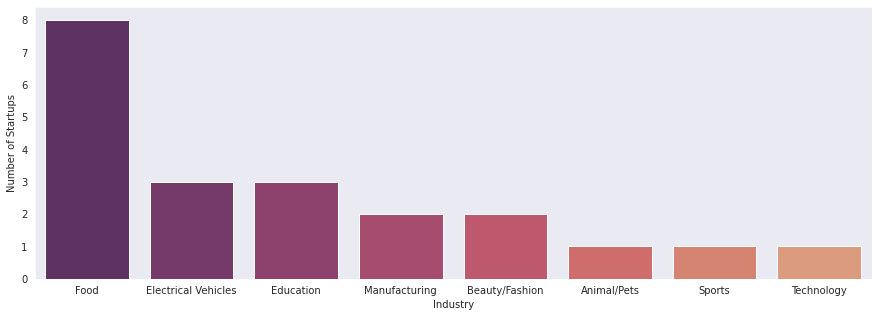

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(shark_tank[shark_tank['Ashneer Investment Amount']!=0]['Industry'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.show()

In [34]:
shark_tank.loc[(shark_tank['Ashneer Investment Amount']!=0),['Startup Name','Number of sharks in deal','Ashneer Investment Amount','Ashneer Investment Equity','Ashneer Debt Amount']].head()

,Startup Name,Number of sharks in deal,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount
Pitch Number,,,,,
1,BluePine Foods,3.0,25.0,5.33,0.0
2,Booz Scooters,2.0,20.0,25.00,0.0
4,Tagz Foods,1.0,70.0,2.75,0.0
16,Skippi Ice Pops,5.0,20.0,3.00,0.0
19,Raising Superstars,2.0,50.0,2.00,0.0


### Anupam's Investment Stats

In [35]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[shark_tank['Anupam Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[shark_tank['Anupam Debt Amount'].sum()//1],
    'Equity Received':[shark_tank['Anupam Investment Equity'].sum()]
},
index=['Count'])

,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,533.830268,15.0,166.346


#### Industry Wise

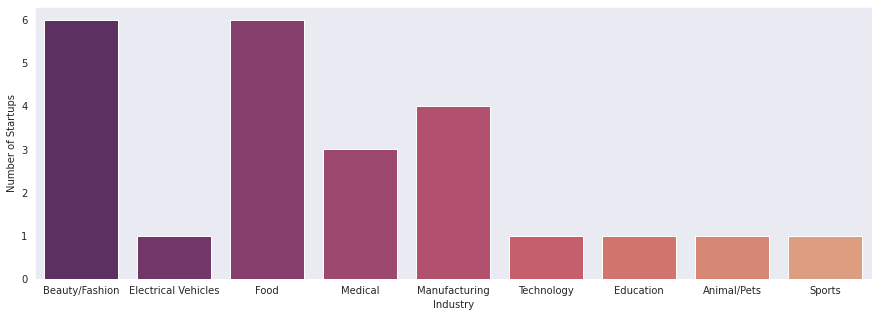

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(shark_tank[shark_tank['Anupam Investment Amount']!=0]['Industry'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.show()

In [37]:
shark_tank.loc[(shark_tank['Anupam Investment Amount']!=0),['Startup Name','Number of sharks in deal','Anupam Investment Amount','Anupam Investment Equity','Anupam Debt Amount']].head()

,Startup Name,Number of sharks in deal,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount
Pitch Number,,,,,
3,Heart up my Sleeves,2.0,12.5,15.00,0.0
10,Cos IQ,2.0,25.0,12.50,0.0
13,Revamp Moto,2.0,50.0,0.75,0.0
16,Skippi Ice Pops,5.0,20.0,3.00,0.0
23,Vivalyf Innovations,2.0,28.0,16.66,0.0


### Namita's Investment Stats

In [38]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[shark_tank['Namita Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[shark_tank['Namita Debt Amount'].sum()//1],
    'Equity Received':[shark_tank['Namita Investment Equity'].sum()]
},
index=['Count'])

,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,680.330268,25.0,140.776


#### Industry Wise

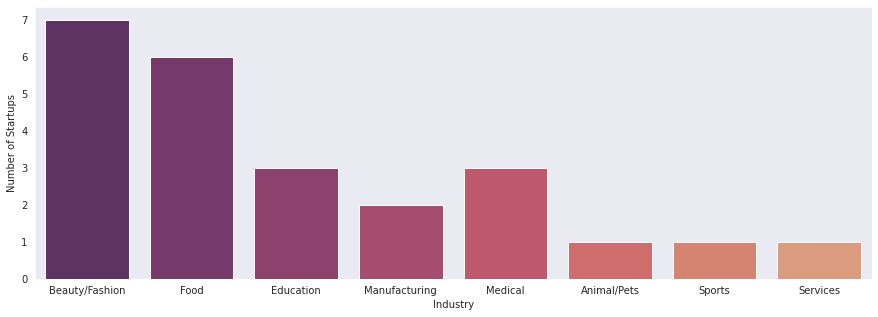

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(shark_tank[shark_tank['Namita Investment Amount']!=0]['Industry'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.show()

In [40]:
shark_tank.loc[(shark_tank['Namita Investment Amount']!=0),['Startup Name','Number of sharks in deal','Namita Investment Amount','Namita Investment Equity','Namita Debt Amount']].head()

,Startup Name,Number of sharks in deal,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount
Pitch Number,,,,,
12,Bummer,2.0,37.50,3.75,0.0
16,Skippi Ice Pops,5.0,20.00,3.00,0.0
17,Menstrupedia,1.0,50.00,20.00,0.0
25,Altor,2.0,25.00,3.50,0.0
28,Nuutjob,3.0,8.33,6.66,0.0


### Vineeta's Investment Stats

In [41]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[shark_tank['Vineeta Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[shark_tank['Vineeta Debt Amount'].sum()//1],
    'Equity Received':[shark_tank['Vineeta Investment Equity'].sum()]
},
index=['Count'])

,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,335.32,30.0,135.53


#### Industry Wise

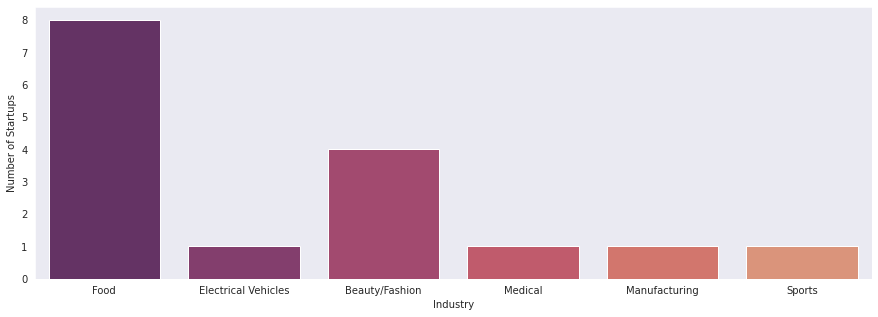

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(shark_tank[shark_tank['Vineeta Investment Amount']!=0]['Industry'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.show()

In [43]:
shark_tank.loc[(shark_tank['Vineeta Investment Amount']!=0),['Startup Name','Number of sharks in deal','Vineeta Investment Amount','Vineeta Investment Equity','Vineeta Debt Amount']].head()

,Startup Name,Number of sharks in deal,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount
Pitch Number,,,,,
1,BluePine Foods,3.0,25.0,5.33,0.0
2,Booz Scooters,2.0,20.0,25.00,0.0
3,Heart up my Sleeves,2.0,12.5,15.00,0.0
9,NOCD,1.0,20.0,15.00,30.0
10,Cos IQ,2.0,25.0,12.50,0.0


### Peyush's Investment Stats

In [44]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[shark_tank['Peyush Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[shark_tank['Peyush Debt Amount'].sum()//1],
    'Equity Received':[shark_tank['Peyush Investment Equity'].sum()]
},
index=['Count'])

,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,789.650252,117.0,317.84


#### Industry Wise

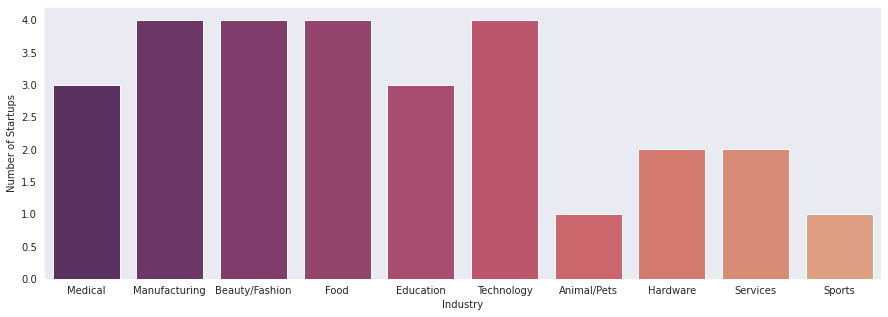

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(shark_tank[shark_tank['Peyush Investment Amount']!=0]['Industry'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.show()

In [46]:
shark_tank.loc[(shark_tank['Peyush Investment Amount']!=0),['Startup Name','Number of sharks in deal','Peyush Investment Amount','Peyush Investment Equity','Peyush Debt Amount']].head()

,Startup Name,Number of sharks in deal,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount
Pitch Number,,,,,
23,Vivalyf Innovations,2.0,28.00,16.66,0.0
26,Ariro,2.0,25.00,5.00,0.0
28,Nuutjob,3.0,8.33,6.66,0.0
29,Meatyour,3.0,10.00,6.66,0.0
30,EventBeep,3.0,10.00,1.00,0.0


### Ghazal's Investment Stats

In [47]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[shark_tank['Ghazal Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[shark_tank['Ghazal Debt Amount'].sum()//1],
    'Equity Received':[shark_tank['Ghazal Investment Equity'].sum()]
},
index=['Count'])

,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,129.990252,0.0,46.7


#### Industry Wise

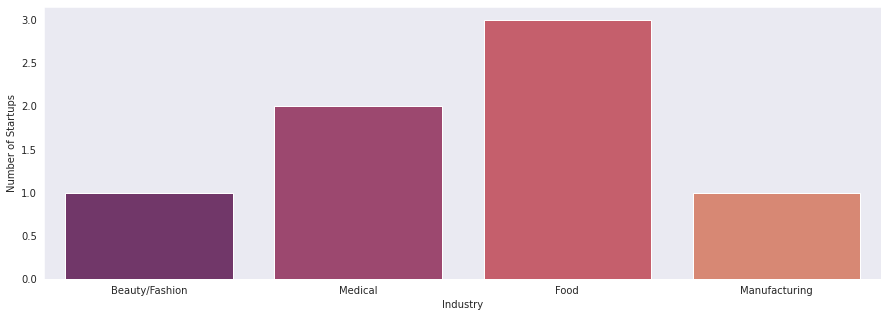

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(shark_tank[shark_tank['Ghazal Investment Amount']!=0]['Industry'], palette='flare_r')
plt.ylabel('Number of Startups')
plt.show()

In [49]:
shark_tank.loc[(shark_tank['Ghazal Investment Amount']!=0),['Startup Name','Number of sharks in deal','Ghazal Investment Amount','Ghazal Investment Equity','Ghazal Debt Amount']].head()

,Startup Name,Number of sharks in deal,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount
Pitch Number,,,,,
76,The Sass Bar,2.0,25.000000,17.5,0.0
80,Sunfox Technologies,5.0,20.000000,1.2,0.0
86,Watt Technovations,4.0,0.000253,1.0,0.0
89,Humpy A2,3.0,33.330000,5.0,0.0
91,Gold Safe Solutions,3.0,16.660000,10.0,0.0
